# Data taken from UCI ML Repository
https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength



### Abstract: Concrete is the most important material in civil engineering. The
concrete compressive strength is a highly nonlinear function of age and
ingredients. These ingredients include cement, blast furnace slag, fly ash,
water, superplasticizer, coarse aggregate, and fine aggregate.

Data Characteristics:

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).

Summary Statistics:

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None



###
Business Goal: To find whihc variable plays an important role Concrete Compressive Strength

Metrics - RMS and R2 Square

I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial
neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).


In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, SCORERS
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, 
                              AdaBoostRegressor, 
                              GradientBoostingRegressor)
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from keras import backend

plt.rcParams['figure.figsize'] = (12,8)

print('All loaded')

All loaded


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read dataset
# data_folder = Path('/content/drive/My Drive/Data_Science/Kaggle/Compressive Concrete Strength')

# data_orig = pd.read_excel( data_folder / 'Concrete_Data.xls')

data_orig = pd.read_excel('Concrete_Data.xls')

In [4]:
data_orig.shape

(1030, 9)

In [5]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
df = data_orig.copy()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water (component 4)(kg in a m^3 mixture),1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [7]:
# Changing column names which makes more sense
column_names =  ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 
             'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate',  
             'Age','Concrete compressive strength']

In [8]:
# rename columns
df.columns = column_names

In [9]:
df.head().T

,0,1,2,3,4
Cement,540.000000,540.000000,332.500000,332.50000,198.600000
Blast Furnace Slag,0.000000,0.000000,142.500000,142.50000,132.400000
Fly Ash,0.000000,0.000000,0.000000,0.00000,0.000000
Water,162.000000,162.000000,228.000000,228.00000,192.000000
Superplasticizer,2.500000,2.500000,0.000000,0.00000,0.000000
Coarse Aggregate,1040.000000,1055.000000,932.000000,932.00000,978.400000
Fine Aggregate,676.000000,676.000000,594.000000,594.00000,825.500000
Age,28.000000,28.000000,270.000000,365.00000,360.000000
Concrete compressive strength,79.986111,61.887366,40.269535,41.05278,44.296075


In [10]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [52]:
# checking if there any null values in dataset
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

# EDA

In [12]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


<AxesSubplot:xlabel='Concrete compressive strength', ylabel='Density'>

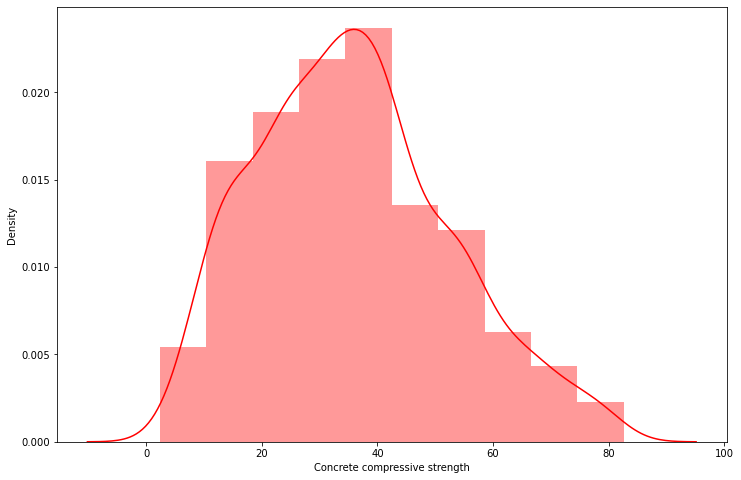

In [47]:
# plotting histogram

sns.distplot(df['Concrete compressive strength'], kde= True, color = 'r',  bins = 10)

<AxesSubplot:xlabel='Water', ylabel='Density'>

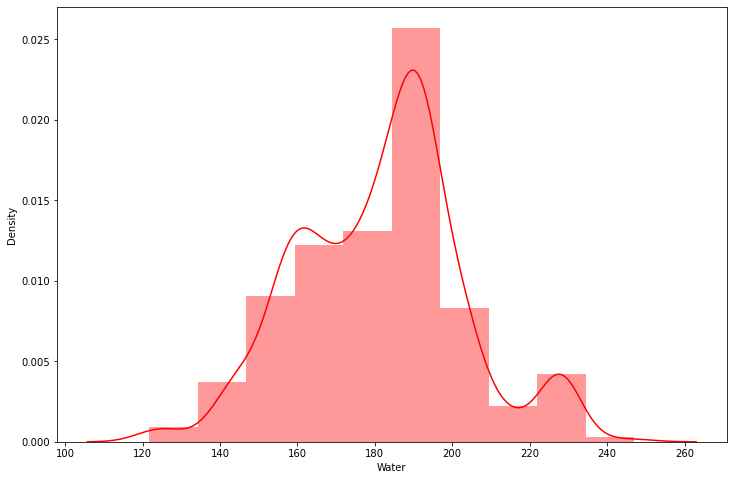

In [48]:
# plotting histogram

sns.distplot(df['Water'], kde= True, color = 'r', bins = 10)

<AxesSubplot:xlabel='Age', ylabel='Density'>

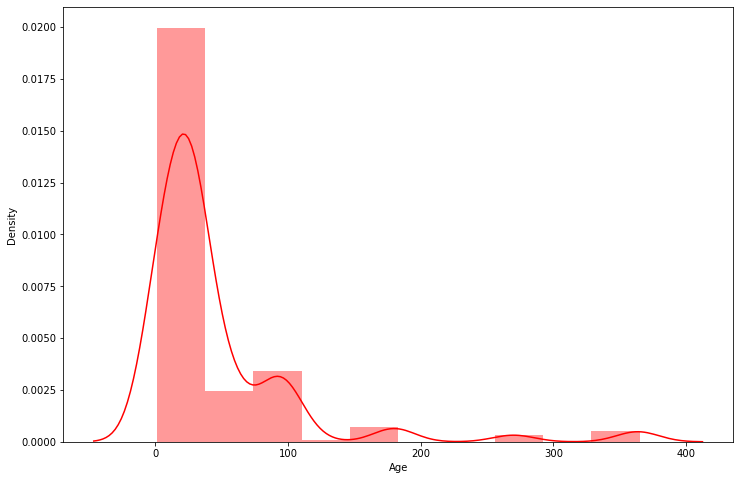

In [49]:
# plotting histogram

sns.distplot(df['Age'], kde= True, color = 'r', bins = 10)

<AxesSubplot:xlabel='Cement', ylabel='Density'>

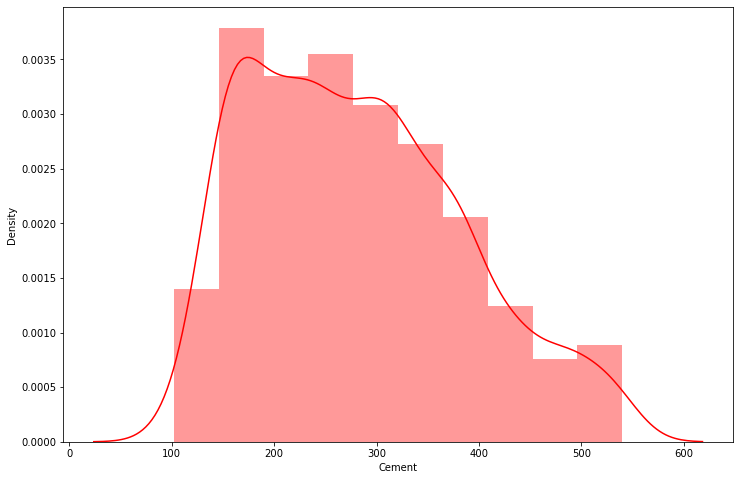

In [50]:
# plotting histogram

sns.distplot(df['Cement'], kde= True, color = 'r', bins = 10)


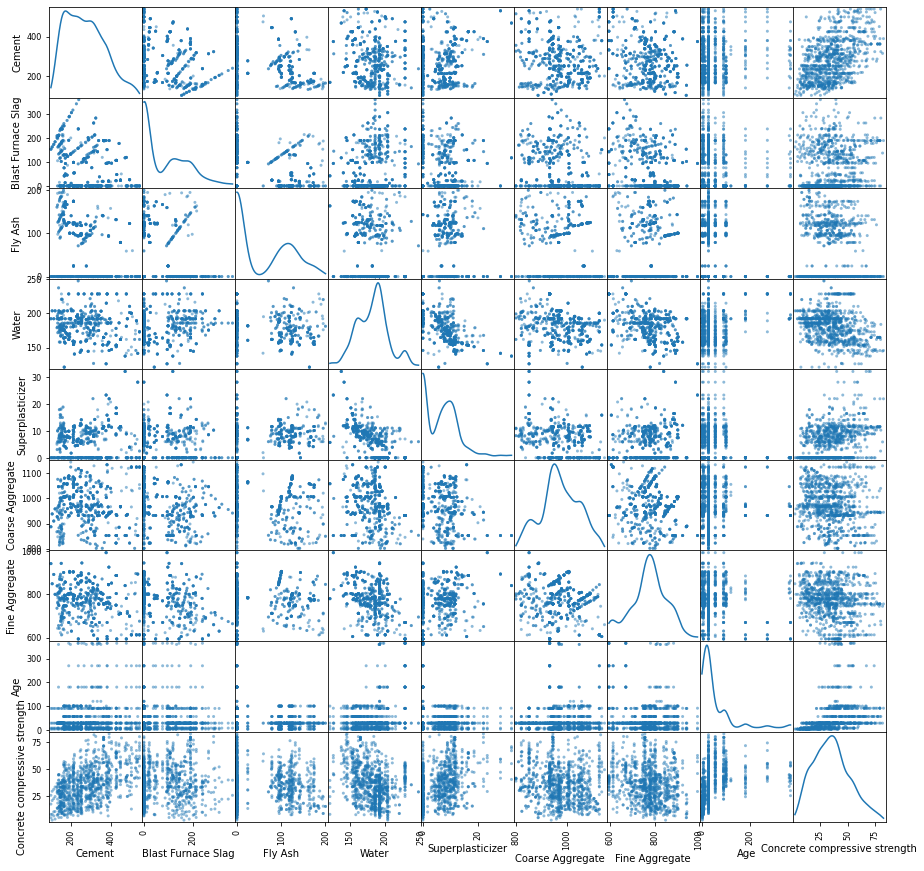

In [17]:
scatter_matrix = scatter_matrix(df, figsize = (15,15), diagonal = 'kde')

No correlation between any of the features

<AxesSubplot:>

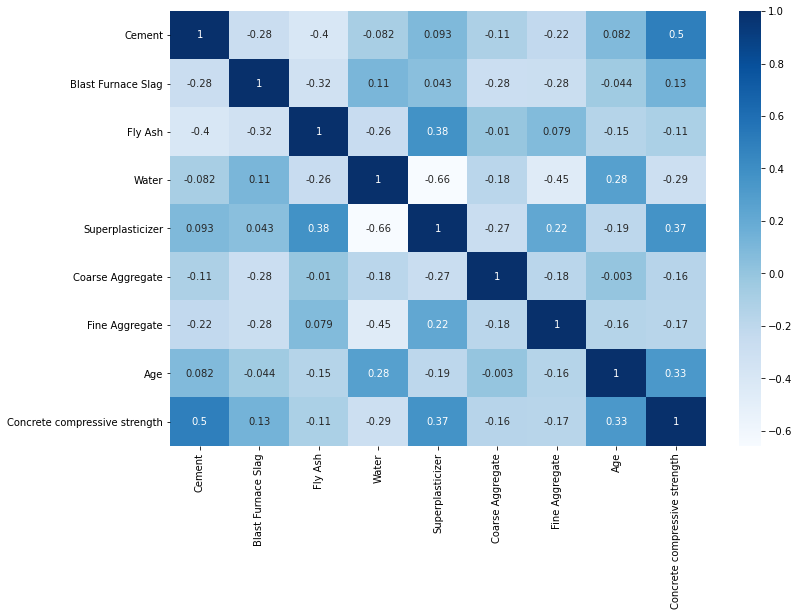

In [18]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')


##### Negative correlation(-0.65) between Water and Superplasticizer.

# Linear Regression

In [19]:
# Splitting the dataset for train, val, and test

X_train, X_test, y_train, y_test = train_test_split(
          df[df.columns[:-1]],
         df[df.columns[-1]],
         test_size = 0.2, random_state = 42)


In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(824, 8) (206, 8) (824,) (206,)


In [21]:
# Cross validation 

cv = KFold(5, random_state = 42)

# applying column standardization
# to avoid data leakage using different scaler for train and test

print('X_train is ', X_train[0:1])
sc = MinMaxScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)
print('X_train_scaled is', X_train_scaled[0:1])

X_train is       Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
995   158.6               148.9    116.0  175.1              15.0   

     Coarse Aggregate  Fine Aggregate  Age  
995             953.3           719.7   28  
X_train_scaled is [[0.12922374 0.41430161 0.59487179 0.4259481  0.46583851 0.44273256
  0.31535374 0.07417582]]


In [22]:
# Linear Regression

lr_rmse = np.sqrt((-1) * cross_val_score(LinearRegression(), 
                X_train_scaled, y_train, cv=cv, 
                scoring = 'neg_mean_squared_error').mean())

lr_r2 = cross_val_score(LinearRegression(),
                        X_train_scaled, y_train, cv = cv,
                        scoring = 'r2').mean()

print( lr_rmse)
print(lr_r2)

10.714836821086735
0.5945342206332567


# Ridge Regression (L2 Penalty)

In [23]:
ridge_rmse = np.sqrt((-1) * cross_val_score(Ridge(), 
                X_train_scaled, y_train, cv=cv, 
                scoring = 'neg_mean_squared_error').mean())

ridge_r2 = cross_val_score(Ridge(),
                        X_train_scaled, y_train, cv = cv,
                        scoring = 'r2').mean()


print(ridge_rmse) 
print(ridge_r2)                      

10.735483550396456
0.5932877949950158


# Lasso Regression(L1 Penalty)

In [24]:
lasso_rmse = np.sqrt((-1) * cross_val_score(Lasso(), 
                X_train_scaled, y_train, cv=cv, 
                scoring = 'neg_mean_squared_error').mean())

lasso_r2 = cross_val_score(Lasso(),
                        X_train_scaled, y_train, cv = cv,
                        scoring = 'r2').mean()

print(lasso_rmse)
print(lasso_r2)

15.164804896952166
0.1879165821885222


# KNN Regressor

In [25]:
knn_rmse = np.sqrt((-1) * cross_val_score(KNeighborsRegressor(), 
                X_train_scaled, y_train, cv=cv, 
                scoring = 'neg_mean_squared_error').mean())

knn_r2 = cross_val_score(KNeighborsRegressor(),
                        X_train_scaled, y_train, cv = cv,
                        scoring = 'r2').mean()

print(knn_rmse)
print(knn_r2)

9.608684432361086
0.6738071926353182


# Decision Tree Regressor

In [26]:
dt_rmse = np.sqrt((-1) * cross_val_score(DecisionTreeRegressor(), 
                X_train_scaled, y_train, cv=cv, 
                scoring = 'neg_mean_squared_error').mean())

dt_r2 = cross_val_score(DecisionTreeRegressor(),
                        X_train_scaled, y_train, cv = cv,
                        scoring = 'r2').mean()
print(dt_rmse)
print(dt_r2)

7.24850431430577
0.8012404150299701


# Random Forest Regressor

In [27]:
rf_rmse = np.sqrt((-1) * cross_val_score(RandomForestRegressor(), 
                X_train_scaled, y_train, cv=cv, 
                scoring = 'neg_mean_squared_error').mean())

rf_r2 = cross_val_score(RandomForestRegressor(),
                        X_train_scaled, y_train, cv = cv,
                        scoring = 'r2').mean()
print(rf_rmse)
print(rf_r2)

5.127766671985943
0.9060011484052852


# Gradient Boosting Regressor

In [28]:
gb_rmse = np.sqrt((-1) * cross_val_score(GradientBoostingRegressor(), 
                X_train_scaled, y_train, cv=cv, 
                scoring = 'neg_mean_squared_error').mean())

gb_r2 = cross_val_score(GradientBoostingRegressor(),
                        X_train_scaled, y_train, cv = cv,
                        scoring = 'r2').mean()
print(gb_rmse)
print(gb_r2)

5.309546559800016
0.9005751973752372


# Adaboost Regressor

In [51]:
ada_rmse = np.sqrt((-1) * cross_val_score(AdaBoostRegressor(), 
                X_train_scaled, y_train, cv=cv, 
                scoring = 'neg_mean_squared_error').mean())

ada_r2 = cross_val_score(AdaBoostRegressor(),
                        X_train_scaled, y_train, cv = cv,
                        scoring = 'r2').mean()
print(ada_rmse)
print(ada_r2)

7.737157334929669
0.7844321903483082


It looks like Gadient Boosting gives best result. Let's tune the hyperparameters

In [30]:

grid_param = {'n_estimators': range(100, 501, 50),
              'max_depth': range(5, 21, 5),
              'min_samples_split': range(200, 1001, 200),
              'learning_rate': [0.3]} #range(0.2, 0.8, 0.1)}
grid_rgr = GridSearchCV(GradientBoostingRegressor(random_state = 42), 
                        param_grid = grid_param,
                        scoring = 'r2', cv =cv)
grid_rgr.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weig...
                                                 presort='deprecated',
                                          

In [31]:
print(grid_rgr.best_estimator_)
print('R Sqaured is :', grid_rgr.best_score_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=200,
                          min_weight_fraction_leaf=0.0, n_estimators=350,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
R Sqaured is : 0.9313726475273167


R2 of 0.93 is the best so far.

#Compare Test dataset

In [32]:
clf_te = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=200,
                          min_weight_fraction_leaf=0.0, n_estimators=350,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
clf_te.fit(X_train_scaled, y_train)

print('RMSE for test is ', np.sqrt(mean_squared_error(y_test,
                                                          clf_te.predict(X_test_scaled))))
print('R2 is', r2_score(y_test, clf_te.predict(X_test_scaled)))



RMSE for test is  4.052031939242526
R2 is 0.9362818476198596


# Neural Network

In [33]:
#https://www.tensorflow.org/tutorials/keras/regression

In [34]:
#https://stackoverflow.com/questions/45250100/kerasregressor-coefficient-of-determination-r2-score

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_true - y_pred), axis=-1))

def r2_square(y_true, y_pred):
    SS_res = backend.sum(backend.square(y_true - y_pred))
    SS_tot = backend.sum(backend.square(y_true - backend.mean(y_true)))
    return (1 - SS_res/(SS_tot + backend.epsilon())) # epsilon to avoid divide by zero

def my_nn_model(input):
  
  model = keras.Sequential([
                  keras.layers.Input(shape = (input )),#, name = ' input_layer'),
                  keras.layers.Dense(10, activation = 'relu'),#,kernel_regularizer=l2(0.0001),name = 'layer1'),
                #   keras.layers.Dropout(0.1),                  
                  keras.layers.Dense(5, activation = 'relu'),#'relu',name = 'layer2'),
                #   keras.layers.Dropout(0.1),
                  keras.layers.Dense(1, #activation = 'relu', 
                                      name = 'final_layer')

                           ])
  model.compile( optimizer = tf.keras.optimizers.Adam(lr = 0.005, decay = 0.0000001),
                loss = tf.keras.losses.mean_squared_error,
                # metrics  = [rmse]#, tf.keras.metrics.RSquare()]
                metrics  = [ rmse, r2_square]
                )
  return model

In [35]:
tf.keras.backend.clear_session() # initialize the model

model_nn = my_nn_model(X_train_scaled.shape[1])
model_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
final_layer (Dense)          (None, 1)                 6         
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [36]:
%%time

EPOCHS = 100
BATCH_SIZE = 32

history_nn = model_nn.fit(
    X_train_scaled, y_train, batch_size = BATCH_SIZE,
    validation_split = 0.2,
    epochs = EPOCHS, verbose=0
)



CPU times: user 11.6 s, sys: 1.62 s, total: 13.2 s
Wall time: 11 s


In [37]:
# convert history to dataframe
history_nn_df = pd.DataFrame(history_nn.history)
history_nn_df.head()

,loss,rmse,r2_square,val_loss,val_rmse,val_r2_square
0,1548.335693,35.398708,-4.742855,1482.686646,35.322010,-5.915607
1,1432.928589,33.768539,-4.100940,1289.792480,32.524128,-5.011931
2,1158.469482,29.492542,-3.193853,914.336487,26.268259,-3.251860
3,726.666199,21.952427,-1.581733,454.754395,17.161123,-1.093889
4,350.719116,14.664187,-0.226801,217.494583,11.745144,0.026651


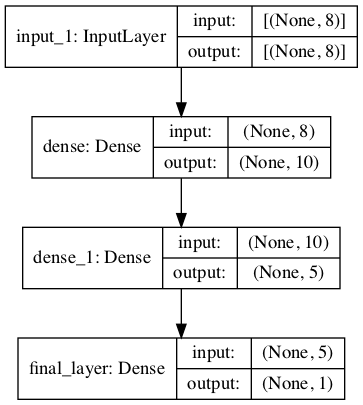

In [38]:
plot_model(model_nn, show_shapes = True)

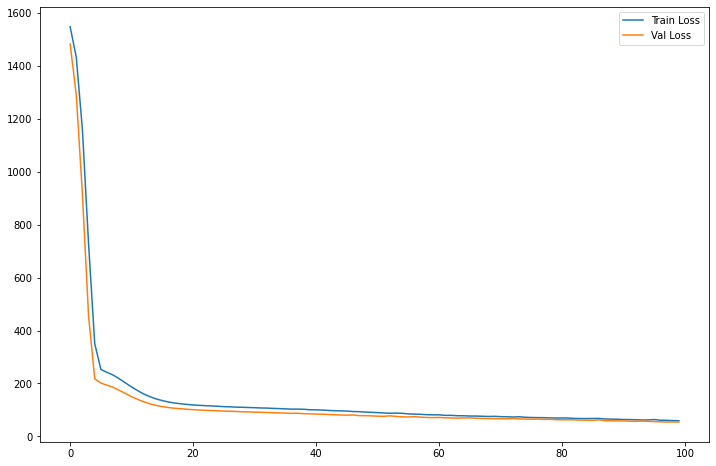

In [39]:
# plot losses
plt.plot(history_nn.epoch, history_nn.history['loss'], label = 'Train Loss')
plt.plot(history_nn.epoch, history_nn.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.show()

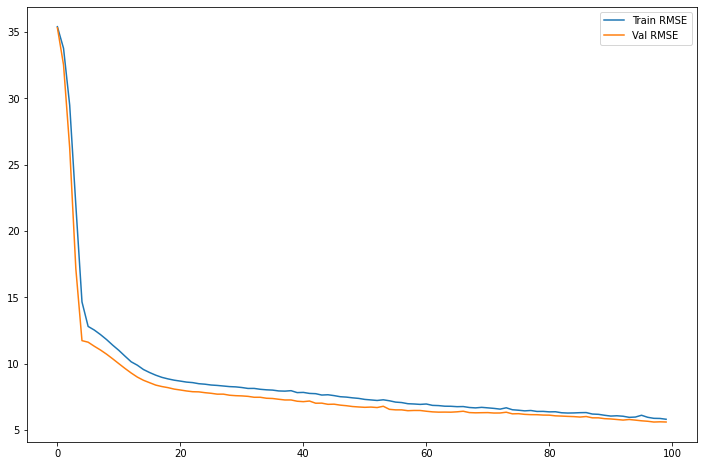

In [40]:
# plot RMSE

plt.plot(history_nn.epoch, history_nn.history['rmse'], label = 'Train RMSE')
plt.plot(history_nn.epoch, history_nn.history['val_rmse'], label = 'Val RMSE')
plt.legend()
plt.show()

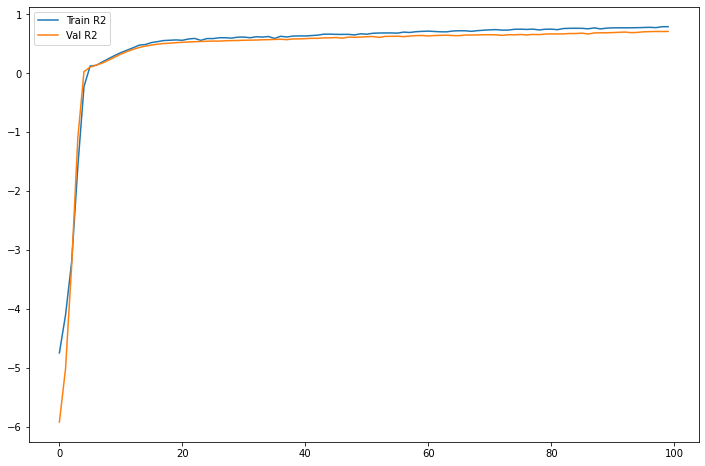

In [41]:
# plot R2 Square

plt.plot(history_nn.epoch, history_nn.history['r2_square'], label = 'Train R2')
plt.plot(history_nn.epoch, history_nn.history['val_r2_square'], label = 'Val R2')
plt.legend()
plt.show()

In [42]:
# print(history_nn.history)
print('Train loss is ',history_nn.history['loss'][-1])
print('Train rmse is ',history_nn.history['rmse'][-1])
print('Train r2_square is ',history_nn.history['r2_square'][-1])

Train loss is  59.397342681884766
Train rmse is  5.822488784790039
Train r2_square is  0.7894365191459656


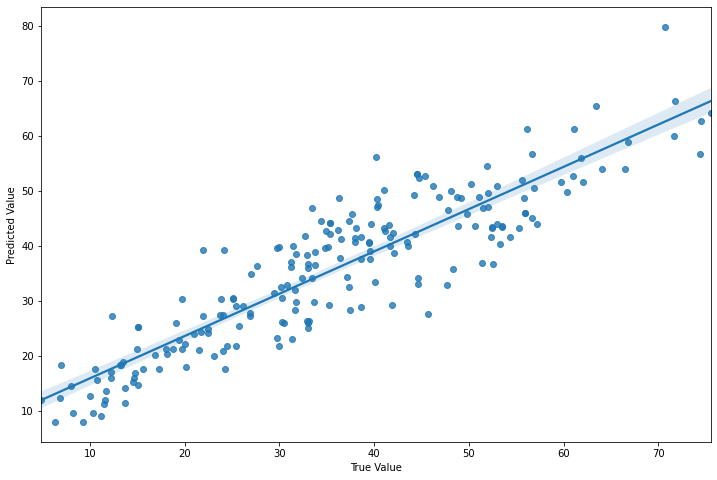

Test rmse is  tf.Tensor(7.049875466120914, shape=(), dtype=float64)
Test r2_square is  tf.Tensor(0.80712306, shape=(), dtype=float32)


In [57]:
#https://www.tensorflow.org/tutorials/keras/regression
# test prediction

test_pred = model_nn.predict(X_test_scaled).flatten()

sns.regplot(y_test, test_pred)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()
print('Test rmse is ',rmse(y_test, test_pred))
print('Test r2_square is ', r2_square(tf.convert_to_tensor(y_test, np.float32), test_pred))
